In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pdb

**~*~*~*~* Plots *~*~*~*~*~**

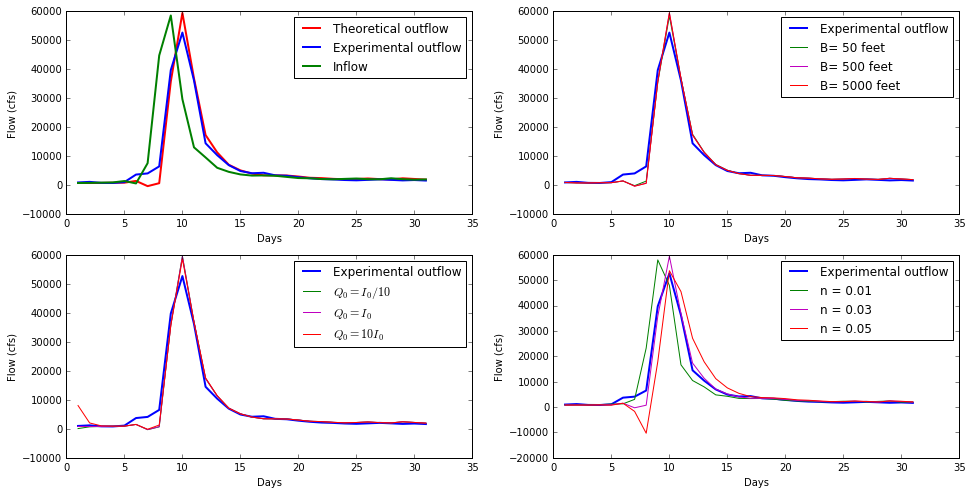

In [2]:
I = np.array([803, 838, 926, 1000, 1480,650, 7640, 44800, 58600, 29700, 13100, 9610, 6050, 4650,
              3760, 3360, 3410, 3300, 2900, 2510, 2420, 2170, 2080, 2220, 2350, 2100, 2080, 2440, 2120, 1940, 2040]) 
            
    #Bent Creek Q is assumed to be inflow, and is represented as I

O_exp = np.array([991, 1192, 847, 811, 1106, 3712, 4106, 6526, 39772, 52694, 36182, 14502, 10410, 6964, 4939,
                  4164, 4329, 3446, 3295, 2814, 2427, 2154, 2032, 1831, 1723, 1881, 2053, 1881, 1694, 1823, 1644])

    # Richmond Q is assumed to be outflow, and is represented as O_exp

days = np.arange(len(O_exp))+1 # a simple array to count the number of days of measured data
O_th = np.zeros(len(O_exp)) #O_th is the theoretical outflow, the equation we are testing
O_th[0] = I[0] #The initial value of O_th is assumed to be the initial value of the inflow

B = 500 #feet
h = 9 #feet
dt = 60*60*24 #one day, in seconds
ds =110.1*5280
S = (224.6-114.6)/(ds ) # slope is the height difference of Bent Creek and Richmond over the distance in feet
kappa = 1.49 
n = 0.03 # a standard assumption for river stream beds, found online

### initial values of Muskingham variables are assumed to be constant throughout the flood period, and are 
### calculated according to the Manning equation, assuming u0 is equal to Manning's V. 

u0=(kappa/n)*S**(1/2.)*h**(2/3.)
c0 = 5/3.*u0
K = ds/c0
x = 0.5 - O_th[0]/(2*B*S*c0*ds)

C0 = -(K*x - 0.5*dt)/(K-K*x+0.5*dt)
C1 = (K*x + 0.5*dt)/(K-K*x+0.5*dt)
C2 = (K-K*x-0.5*dt)/(K-K*x+0.5*dt)

for i in range(len(O_th)-1):
    O_th[i+1] = C0*I[i+1] + C1*I[i] + C2*O_th[i]
    
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(days, O_th, lw = 2, c = 'r')
plt.plot(days, O_exp, lw = 2, c = 'b')
plt.plot(days, I, lw = 2, c = 'g')
plt.legend(['Theoretical outflow', 'Experimental outflow', 'Inflow'])
plt.xlabel('Days')
plt.ylabel('Flow (cfs)')



### This next section is super long because I wasn't concerned with coding efficiency at the time. 
### Most of this is just repeating the code from the initial plot, but I conducted a few sensitivity tests which are 
### noted in comments.

plt.subplot(2,2,2)
days = np.arange(len(O_exp))+1
Oth_0 = O_exp[0]
O_th = np.zeros(len(O_exp))
O_th[0] = O_exp[0]
Bs = [50, 500, 5000] # Varying stream width by an order of magnitude in both directions
plt.plot(days, O_exp, lw = 2, c = 'b')
colors = ['g', 'm', 'r']
for H in range(len(Bs)):
    B = Bs[H]
    h = 9
    dt = 60*60*24
    S = (224.6-114.6)/(110.1*5280.)
    kappa = 1.49
    n = 0.03
    u0=(kappa/n)*S**(1/2.)*h**(2/3.)
    ds =110.1*5280
    c0 = 5/3.*u0
    K = ds/c0
    x = 0.5 - Oth_0/(2*B*S*c0*ds)
    C0 = -(K*x - 0.5*dt)/(K-K*x+0.5*dt)
    C1 = (K*x + 0.5*dt)/(K-K*x+0.5*dt)
    C2 = (K-K*x-0.5*dt)/(K-K*x+0.5*dt)
    for i in range(len(O_th)-1):
        O_th[i+1] = C0*I[i+1] + C1*I[i] + C2*O_th[i]
    plt.plot(days, O_th, lw = 1, c = colors[H])
plt.legend(['Experimental outflow', 'B= 50 feet', 'B= 500 feet', 'B= 5000 feet'])
plt.xlabel('Days')
plt.ylabel('Flow (cfs)')


plt.subplot(2,2,3)
days = np.arange(len(O_exp))+1

O_th = np.zeros(len(O_exp))
Oth_0 = [I[0]/10., I[0], I[0]*10] # Varying initial outflow by an order of magnitude
B =  500
plt.plot(days, O_exp, lw = 2, c = 'b')
colors = ['g', 'm', 'r']
for H in range(len(Oth_0)):
    O_th[0] = Oth_0[H]
    h = 9
    dt = 60*60*24
    S = (224.6-114.6)/(110.1*5280.)
    kappa = 1.49
    n = 0.03
    u0=(kappa/n)*S**(1/2.)*h**(2/3.)
    ds =110.1*5280
    c0 = 5/3.*u0
    K = ds/c0
    x = 0.5 - O_th[0]/(2*B*S*c0*ds)
    C0 = -(K*x - 0.5*dt)/(K-K*x+0.5*dt)
    C1 = (K*x + 0.5*dt)/(K-K*x+0.5*dt)
    C2 = (K-K*x-0.5*dt)/(K-K*x+0.5*dt)
    for i in range(len(O_th)-1):
        O_th[i+1] = C0*I[i+1] + C1*I[i] + C2*O_th[i]
    plt.plot(days, O_th, lw = 1, c = colors[H])
plt.legend(['Experimental outflow', '$Q_0 = I_0/10$', '$Q_0 = I_0$', '$Q_0 = 10I_0$'])
plt.xlabel('Days')
plt.ylabel('Flow (cfs)')


days = np.arange(len(O_exp))+1
Oth_0 = I[0]
O_th = np.zeros(len(O_exp))
O_th[0] = I[0]
B = 500
h = 9
dt = 60*60*24
S = (224.6-114.6)/(110.1*5280.)
kappa = 1.49
ns = [0.01, 0.03, 0.05] #Varying manning coefficient by an order of magnitude
plt.subplot(2,2,4)
plt.plot(days, O_exp, lw = 2, c = 'b')
for H in range(len(ns)):
    n = ns[H]
    u0=(kappa/n)*S**(1/2.)*h**(2/3.)
    ds =110.1*5280
    c0 = 5/3.*u0
    K = ds/c0
    x = 0.5 - Oth_0/(2*B*S*c0*ds)
    C0 = -(K*x - 0.5*dt)/(K-K*x+0.5*dt)
    C1 = (K*x + 0.5*dt)/(K-K*x+0.5*dt)
    C2 = (K-K*x-0.5*dt)/(K-K*x+0.5*dt)
    for i in range(len(O_th)-1):
        O_th[i+1] = C0*I[i+1] + C1*I[i] + C2*O_th[i]
    plt.plot(days, O_th, lw = 1, c = colors[H])
    plt.legend(['Experimental outflow', 'n = 0.01', 'n = 0.03', 'n = 0.05'])
plt.xlabel('Days')
plt.ylabel('Flow (cfs)')

plt.show()


**~*~*~*Analysis~*~*~*~**

The combined Muskingham method and the Manning equation are adequate at recreating measured outflow. The rise and the fall of the outflow relative to the inflow are the effectively same save for two places. The hydrograph briefly goes negative before the rise of outflow, an impossible prediction, and it overshoots the maximum outflow. In these models, x is determined to be 0.4996, meaning that the Q_0⁄((2BSc∆s)) term is several orders of magnitude below any regime of consequence. Thus, Q0 and B can both vary up to an order of magnitude and not affect the hydrograph, as x effectively remains at 0.5. The manning coefficient is not so insensitive. Increasing the manning coefficient to 0.5 brings the peak of the hydrograph closer to predicted levels, but translates the beginning of the outflow forward in time. Thus, the manning coefficient would seem to be the most important parameter to understand when trying to predict flood routing.

